# Mi Band Data Analysis - Maitreya Kadam

1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.14.0


In [2]:
activity=pd.read_csv("ACTIVITY.csv")

In [3]:
activity.isnull().sum()

date           0
steps          0
distance       0
runDistance    0
calories       0
Day            0
year           0
month_no       0
month_name     0
dtype: int64

In [4]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1867 non-null   object
 1   steps        1867 non-null   int64 
 2   distance     1867 non-null   int64 
 3   runDistance  1867 non-null   int64 
 4   calories     1867 non-null   int64 
 5   Day          1867 non-null   object
 6   year         1867 non-null   int64 
 7   month_no     1867 non-null   int64 
 8   month_name   1867 non-null   object
dtypes: int64(6), object(3)
memory usage: 131.4+ KB


In [5]:
activity.shape

(1867, 9)

# Outlier Detection and Elimination

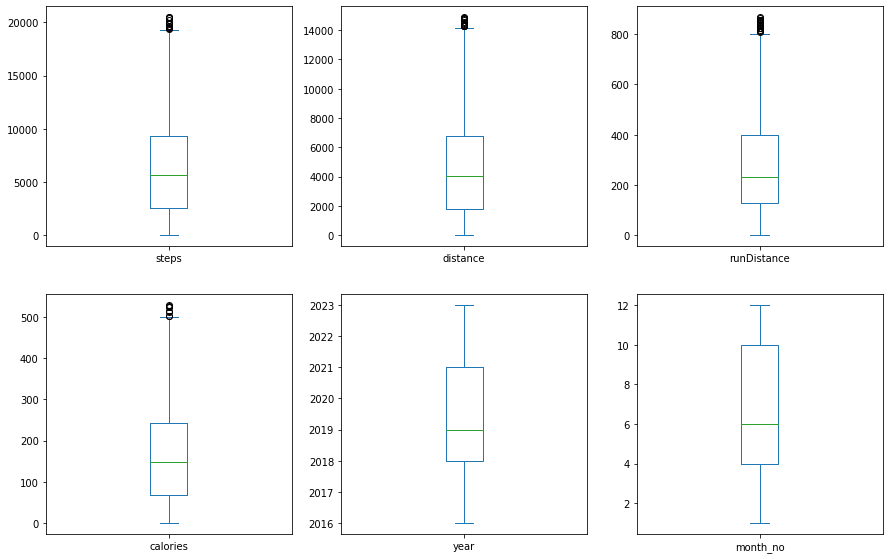

In [6]:
#Outlier Visualisation
activity.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
plt.show()

In [7]:
import numpy as np
import pandas as pd

# load data from CSV file
activity = pd.read_csv('ACTIVITY.csv')

# calculate the interquartile range (IQR) for each feature
Q1 = activity.quantile(0.25)
Q3 = activity.quantile(0.75)
IQR = Q3 - Q1

# identify outliers using the IQR method
outliers = activity[((activity < (Q1 - 1.5 * IQR)) | (activity > (Q3 + 1.5 * IQR))).any(axis=1)]

# remove outliers from the dataset
activity = activity[~((activity < (Q1 - 1.5 * IQR)) | (activity > (Q3 + 1.5 * IQR))).any(axis=1)]

# print the number of outlier data points
print('Number of outliers:', len(outliers))

# print the shape of the clean dataset
print('Shape of clean dataset:', activity.shape)

Number of outliers: 45
Shape of clean dataset: (1822, 9)


C:\Program Files\KMSpico\temp\ipykernel_4064\1189827408.py:13: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

C:\Program Files\KMSpico\temp\ipykernel_4064\1189827408.py:16: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Relationship between Calories and Total Steps

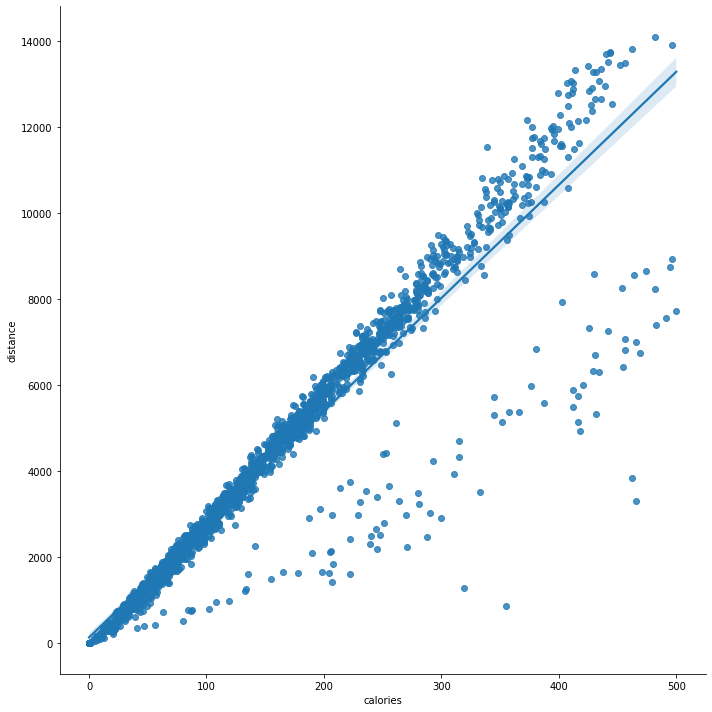

In [8]:
sns.lmplot(x='calories',y='distance',data=activity,height=10)

There is a linear relationship between calories burnt and the distance covered

We will convert the date which is an object datatype into a datetime column

In [9]:
activity["date"] = pd.to_datetime(activity["date"],format="%Y-%m-%d")
activity.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 1866
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1822 non-null   datetime64[ns]
 1   steps        1822 non-null   int64         
 2   distance     1822 non-null   int64         
 3   runDistance  1822 non-null   int64         
 4   calories     1822 non-null   int64         
 5   Day          1822 non-null   object        
 6   year         1822 non-null   int64         
 7   month_no     1822 non-null   int64         
 8   month_name   1822 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 142.3+ KB


In [10]:
activity["Day"] = activity["date"].dt.day_name()
print(activity["Day"].head())

0    Wednesday
1     Saturday
2       Sunday
3       Monday
4    Wednesday
Name: Day, dtype: object


In [11]:
activity.head()

,date,steps,distance,runDistance,calories,Day,year,month_no,month_name
0,2016-04-27,4948,3242,46,281,Wednesday,2016,4,April
1,2016-04-30,4126,2981,11,207,Saturday,2016,4,April
2,2016-05-01,3869,2651,0,244,Sunday,2016,5,May
3,2016-05-02,10004,7330,0,426,Monday,2016,5,May
4,2016-05-04,6295,4341,0,315,Wednesday,2016,5,May


In [12]:
activity['year']=activity['date'].dt.year
activity['month_no']=activity['date'].dt.month
activity['month_name']=activity['date'].dt.month_name()
activity.head(3)

,date,steps,distance,runDistance,calories,Day,year,month_no,month_name
0,2016-04-27,4948,3242,46,281,Wednesday,2016,4,April
1,2016-04-30,4126,2981,11,207,Saturday,2016,4,April
2,2016-05-01,3869,2651,0,244,Sunday,2016,5,May


In [13]:
fig = px.pie(activity, values='steps', names='year')
fig.update_traces(textinfo='label+value')
fig.update_layout(title="Pie Chart of Step-count between the years 2016-2023")
fig.show()

fig = px.pie(activity, values='calories', names='year')
fig.update_traces(textinfo='label+value')
fig.update_layout(title="Pie Chart of Calories burned between the years 2016-2023")
fig.show()


The data is present between years 2016 and 2023. So we will analyse the data for the year 
- 2019 in which I have taken the maximum number of steps.
- 2020 which was the year of lockdown.

# For the year 2019

In [14]:
selected_year=2019
selected_df=activity[activity['year']==selected_year]
selected_df.head(2)

,date,steps,distance,runDistance,calories,Day,year,month_no,month_name
741,2019-01-01,10937,7515,620,251,Tuesday,2019,1,January
742,2019-01-02,9095,6039,800,205,Wednesday,2019,1,January


Distribution of Steps Month-wise

In [15]:
plt.figure(figsize=(15, 6))
fig = px.bar(selected_df, x = 'month_name', y ='steps',title="Bar Chart of Monthly Steps taken for the year 2019",color ='month_name' )

fig.show()

plt.figure(figsize=(15, 6))
fig = px.bar(selected_df, x = 'month_name', y ='calories',title="Bar Chart of Monthly Calories burned for the year 2019",color ='month_name' )
fig.show()

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

Distribution of Calories Month-wise

In [16]:
fig = px.pie(selected_df, values='steps', names='month_name',title="Pie Chart of Monthly Steps taken for the year 2019",color_discrete_sequence=px.colors.sequential.Plasma,
           template = "plotly_dark")
fig.update_traces(textinfo='label+value')
fig.show()

fig = px.pie(selected_df, values='calories', names='month_name',title="Pie Chart of Monthly Calories burned for the year 2019",color_discrete_sequence=px.colors.sequential.Plasma,
           template = "plotly_dark")
fig.update_traces(textinfo='label+value')
fig.show()


From the above graphs we can conclude that:
- August accounted for the highest step-count of 3,20,771 steps
- April accounted for the least step-count of 2,00,470 steps
- March saw the highest calories burned with a number of 7,986 cal
- April accounted for the least calories burned with a display of just 4985 cal

# For March 2019

In [17]:
selected_df_march=selected_df[selected_df['month_name']=='March']
selected_df_march.head(2)

,date,steps,distance,runDistance,calories,Day,year,month_no,month_name
796,2019-03-03,11923,8922,356,311,Sunday,2019,3,March
797,2019-03-05,3936,2876,166,96,Tuesday,2019,3,March


In [18]:
plt.figure(figsize=(15, 6))
fig = px.bar(selected_df_march, x = 'Day', y ='steps',title = 'Steps Distribution for March 2019',color ='steps',text_auto = True )
fig.show()

plt.figure(figsize=(15, 6))
fig = px.bar(selected_df_march, x = 'Day', y ='calories', title='Calories burned for March 2019',color ='calories',text_auto = True )
fig.show()

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [19]:
fig = px.pie(selected_df_march, values='steps', names='Day',title="Pie Chart of Daily Steps taken for March 2019",
             template='plotly_dark',color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_traces(textinfo='label+value')
fig.show()

fig = px.pie(selected_df_march, values='calories', names='Day',title="Pie Chart of Daily Calories burned for March 2019",
             template='plotly_dark',color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_traces(textinfo='label+value')
fig.show()


From the above graphs we can conclude that:
- The highest no of steps taken and the calories burned were for Monday with a Step count:  58692 and calories burned: 1,497 kcal
- The lowest no of steps taken and the calories burned were for Sunday with a Step count: 36,210 and calories burned: 903 cal

# For August 2019

In [20]:
selected_df_aug=selected_df[selected_df['month_name']=='August']
selected_df_aug.head(2)

,date,steps,distance,runDistance,calories,Day,year,month_no,month_name
921,2019-08-01,12326,8983,724,324,Thursday,2019,8,August
922,2019-08-02,10161,7207,513,260,Friday,2019,8,August


In [21]:
plt.figure(figsize=(15, 6))
fig = px.bar(selected_df_aug, x = 'Day', y ='steps',title = 'Steps Distribution for August 2019',color ='steps',text_auto = True )
fig.show()

plt.figure(figsize=(15, 6))
fig = px.bar(selected_df_aug, x = 'Day', y ='calories', title='Calories burned for August 2019',color ='calories',text_auto = True )
fig.show()

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [22]:
fig = px.pie(selected_df_aug, values='steps', names='Day',title="Pie Chart of Daily Steps taken for August 2019",color_discrete_sequence=px.colors.sequential.Magma)
fig.update_traces(textinfo='label+value')
fig.show()

fig = px.pie(selected_df_aug, values='calories', names='Day',title="Pie Chart of Daily Calories burned for August 2019",
             color_discrete_sequence=px.colors.sequential.Magma)
fig.update_traces(textinfo='label+value')
fig.show()


From the above graphs we can conclude that:
- The highest no of steps taken and the calories burned were for Friday with a Step count:  74,901 and calories burned: 1,783 cal
- The lowest no of steps taken and the calories burned were for Wednesday with a Step count: 27,373 and calories burned: 643 cal

# For April 2019 

In [23]:
selected_df_april=selected_df[selected_df['month_name']=='April']
selected_df_april.head(2)

,date,steps,distance,runDistance,calories,Day,year,month_no,month_name
821,2019-04-01,2474,1708,82,56,Monday,2019,4,April
822,2019-04-02,9711,6932,531,240,Tuesday,2019,4,April


In [24]:
plt.figure(figsize=(15, 6))
fig = px.bar(selected_df_april, x = 'Day', y ='steps',title = 'Steps Distribution for April 2019',color ='steps',text_auto = True )
fig.show()

plt.figure(figsize=(15, 6))
fig = px.bar(selected_df_april, x = 'Day', y ='calories', title='Calories burned for April 2019',color ='calories',text_auto = True )
fig.show()

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [25]:
fig = px.pie(selected_df_april, values='steps', names='Day',title="Pie Chart of Daily Steps taken for April 2019",color_discrete_sequence=px.colors.sequential.Magma)
fig.update_traces(textinfo='label+value')
fig.show()

fig = px.pie(selected_df_april, values='calories', names='Day',title="Pie Chart of Daily Calories burned for April 2019",
             color_discrete_sequence=px.colors.sequential.Magma)
fig.update_traces(textinfo='label+value')
fig.show()


From the above graphs we can conclude that:
- The highest no of steps taken and the calories burned were for Tuesday with a Step count:  43,725 and calories burned: 1,127 cal
- The lowest no of steps taken and the calories burned were for Sunday with a Step count: 9,957 and calories burned: 251 cal